# Exercise 1 : Training a 97% classifier on MNIST using KNN

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import time
#Upload the mnist dataset using sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

/home/omar/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# We split the data set into training and testing set
X, y = mnist["data"], mnist["target"]
X_train, X_test,y_train , y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
# We put the test set away  
# We initialize a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
tic = time.time()
# We initialize the model
knn = KNeighborsClassifier()
tac = time.time()
#We fit it
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
print(tac-tic)
import matplotlib.pyplot as plt

digit = X[0]
def plt_img(img):
    digit_img = img.reshape(28,28)
    plt.imshow(digit_img, cmap="binary")

# Test prediction, the model did good
knn.predict([X[0]])

5.698204040527344e-05


array(['5'], dtype=object)

In [ ]:
# Evaluating the model using cross validation

from sklearn.model_selection import cross_val_score
#cross_val_score(knn, X_train, y_train, cv=3, scoring = "accuracy")


In [ ]:
### This takes way too long to run ! 

# Exercise 2 : Data Augmentation

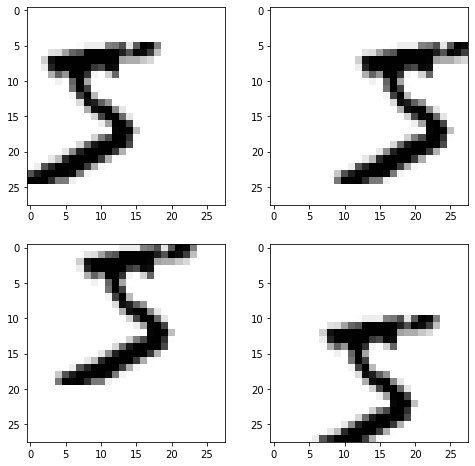

In [30]:
# We write a function that can shift an image in each direction
from scipy.ndimage.interpolation import shift

def augmentation(image,direction):
    
    assert direction in {"left", "right", "up", "down"}, "Direction not in left, right, up, or down"
    
    image_to_shift = image.reshape(28,28)
    if direction =="left":
        shifted = shift(image_to_shift,[0,-5])
    elif direction =="right":
        shifted = shift(image_to_shift,[0,5])
    elif direction =="up":
        shifted = shift(image_to_shift,[-5,0])
    elif direction =="down":
        shifted = shift(image_to_shift,[5,0])
    
    return(shifted.reshape(784))

# We make the test with 5 pixels to make sure it worked
plt.figure(figsize=(8,8))
plt.subplot(221); plt_img(augmentation(X[0],"left"))
plt.subplot(222); plt_img(augmentation(X[0],"right"))
plt.subplot(223); plt_img(augmentation(X[0],"up"))
plt.subplot(224); plt_img(augmentation(X[0],"down"))

# Exercice 3: Tackling the Titanic Dataset